In [61]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import cartopy.crs as ccrs
import plotly.express as px


year = '2022'
# Load the GeoJSON file
file_path = f'ratio_domestic/{year}/hex_cost_components.geojson'  # Update with the correct path if necessary
# file_path = f'ratio_domestic/{year}/hex_cost_components.geojson'
gdf = gpd.read_file(file_path)
gdf = gdf.drop_duplicates(subset="h3_index")
# gdf.columns

In [46]:
demand_center = 'Vientiane'

pipeline_count = np.sum(gdf[f'{demand_center} pipeline total cost'] == gdf[f'{demand_center} lowest cost'])
trucking_count = np.sum(gdf[f'{demand_center} trucking total cost'] == gdf[f'{demand_center} lowest cost'])
total_count = pipeline_count + trucking_count

# Calculate percentages
pipeline_percentage = (pipeline_count / total_count) * 100
trucking_percentage = (trucking_count / total_count) * 100

# Print results
print(f"Pipeline: {pipeline_count} ({pipeline_percentage:.2f}%), Trucking: {trucking_count} ({trucking_percentage:.2f}%)")

Pipeline: 4 (0.56%), Trucking: 705 (99.44%)


In [47]:
np.sum(gdf[f'{demand_center} lowest cost'].isna())

np.int64(231)

In [48]:
gdf['Vientiane trucking H2 storage capacity'].mean()

np.float64(3714.7710267682487)

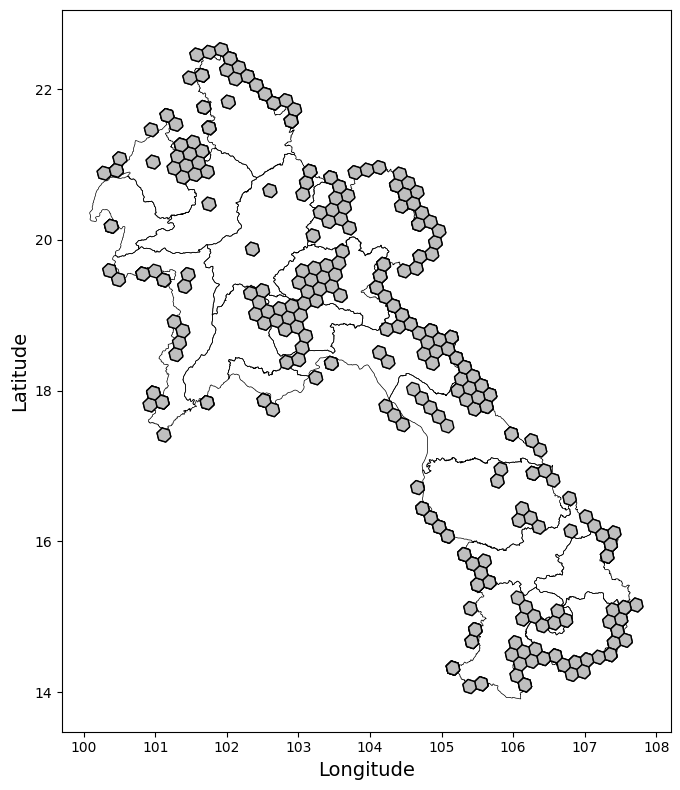

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt

# List of years you want to process
years = ['2022', '2025']

# Define the demand center name (replace with your actual demand center name)
demand_center = 'Vientiane'  # Replace with your actual demand center

# Initialize a dictionary to store GeoDataFrames for non-feasible hexagons
non_feasible_hexagons = {}

# Load the province boundaries GeoDataFrame
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Load and filter the GeoJSON files for each year
for year in years:
    # Construct the file path
    file_path = f'ratio_domestic/{year}/hex_cost_components.geojson'
    
    # Load the GeoJSON file
    gdf = gpd.read_file(file_path)
    
    # Filter out the hexagons that are not feasible
    non_feasible_hexagons[year] = gdf[gdf[f'{demand_center} lowest cost'].isna()]

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the province boundaries
provinces.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Define shades of grey for each year
colors = {
    '2022': '#969696',  # light grey
    '2025': '#bfbfbf',  # medium light grey
    '2030': '#969696',  # medium grey
    'post_2030': '#969696'  # dark grey
}

# Plot the non-feasible hexagons for each year
for year, gdf in non_feasible_hexagons.items():
    gdf.plot(ax=ax, color=colors[year], edgecolor='black', label=f'{year}')

# Customize the plot
# ax.set_title('Non-Feasible Hexagons Over the Years', fontsize=18)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Customize legend with larger font size
# ax.legend(fontsize=12, loc='upper right', frameon=True, shadow=True)

# Save and show the plot
plt.tight_layout()
plt.savefig('non_feasible_hexagons_over_years.png', dpi=300, bbox_inches='tight')
plt.show()


In [62]:
print("\nPipeline min/avg LCOH cost:")
print(gdf[f'{demand_center} pipeline production cost'].min())
print(gdf[f'{demand_center} pipeline production cost'].mean())
# print(gdf[f'{demand_center} pipeline production cost'].max())
print("Pipeline min/avg total cost:")
print(gdf[f'{demand_center} pipeline total cost'].min())
print(gdf[f'{demand_center} pipeline total cost'].mean())
# print(gdf[f'{demand_center} pipeline total cost'].max())
print("\nTrucking min/avg LCOH cost:")
print(gdf[f'{demand_center} trucking production cost'].min())
print(gdf[f'{demand_center} trucking production cost'].mean())
# print(gdf[f'{demand_center} trucking production cost'].max())
print("\nTrucking min/avg total cost:")
print(gdf[f'{demand_center} trucking total cost'].min())
print(gdf[f'{demand_center} trucking total cost'].mean())
# print(gdf[f'{demand_center} trucking total cost'].max())


print("\nLowest cost min/max total cost:")
print(gdf[f'{demand_center} lowest cost'].min())
# print(gdf[f'{demand_center} lowest cost'].max())


Pipeline min/avg LCOH cost:
2.312488513676665
11.145581152587738
Pipeline min/avg total cost:
2.994154509721209
12.480002389436788

Trucking min/avg LCOH cost:
2.3976814087727063
11.215521001059034

Trucking min/avg total cost:
2.758680107139934
11.638376011754211

Lowest cost min/max total cost:
2.758680107139934


In [54]:


print("\nPipeline min/avg LCOH cost:")
print(gdf[f'{demand_center} pipeline production cost'].min())
print(gdf[f'{demand_center} pipeline production cost'].mean())
# print(gdf[f'{demand_center} pipeline production cost'].max())
print("Pipeline min/avg total cost:")
print(gdf[f'{demand_center} pipeline total cost'].min())
print(gdf[f'{demand_center} pipeline total cost'].mean())
# print(gdf[f'{demand_center} pipeline total cost'].max())
print("\nTrucking min/avg LCOH cost:")
print(gdf[f'{demand_center} trucking production cost'].min())
print(gdf[f'{demand_center} trucking production cost'].mean())
# print(gdf[f'{demand_center} trucking production cost'].max())
print("\nTrucking min/avg total cost:")
print(gdf[f'{demand_center} trucking total cost'].min())
print(gdf[f'{demand_center} trucking total cost'].mean())
# print(gdf[f'{demand_center} trucking total cost'].max())


Pipeline min/avg LCOH cost:
2.312488513676665
11.145581152587738
Pipeline min/avg total cost:
2.994154509721209
12.480002389436788

Trucking min/avg LCOH cost:
2.3976814087727063
11.215521001059034

Trucking min/avg total cost:
2.758680107139934
11.638376011754211


In [55]:
trucking_columns = [
    'h3_index',
    'Vientiane road construction costs',
    'Vientiane trucking transport and conversion costs',
    'Vientiane trucking state',
    'Vientiane trucking solar capacity', 'Vientiane trucking wind capacity',
    'Vientiane trucking hydro capacity',
    'Vientiane trucking electrolyzer capacity',
    'Vientiane trucking battery capacity',
    'Vientiane trucking H2 storage capacity',
    'Vientiane trucking production cost',
    'Lowest water cost',
    'Vientiane trucking total cost',
    'Vientiane trucking battery costs',
    'Vientiane LCOH - trucking battery costs portion',
    'Vientiane trucking electrolyzer costs',
    'Vientiane LCOH - trucking electrolyzer portion',
    'Vientiane trucking H2 storage costs',
    'Vientiane LCOH - trucking H2 storage portion',
    'Vientiane trucking wind costs',
    'Vientiane LCOH - trucking wind portion',
    'Vientiane trucking solar costs',
    'Vientiane LCOH - trucking solar portion',
    'Vientiane trucking hydro costs',
    'Vientiane LCOH - trucking hydro portion',
    'Vientiane lowest cost',
    'geometry'
]

pipeline_columns = [
    'h3_index', 
    'Vientiane pipeline transport and conversion costs',
    'Vientiane pipeline solar capacity', 'Vientiane pipeline wind capacity',
    'Vientiane pipeline hydro capacity',
    'Vientiane pipeline electrolyzer capacity',
    'Vientiane pipeline battery capacity',
    'Vientiane pipeline H2 storage capacity',
    'Vientiane pipeline production cost',
    'Lowest water cost',
    'Vientiane pipeline total cost',
    'Vientiane pipeline battery costs',
    'Vientiane LCOH - pipeline battery costs portion',
    'Vientiane pipeline electrolyzer costs',
    'Vientiane LCOH - pipeline electrolyzer portion',
    'Vientiane pipeline H2 storage costs',
    'Vientiane LCOH - pipeline H2 storage portion',
    'Vientiane pipeline wind costs',
    'Vientiane LCOH - pipeline wind portion',
    'Vientiane pipeline solar costs',
    'Vientiane LCOH - pipeline solar portion',
    'Vientiane pipeline hydro costs',
    'Vientiane LCOH - pipeline hydro portion',
    'Vientiane lowest cost',
    'geometry'
]


gdf_trucking = gdf[trucking_columns]
gdf_pipeline = gdf[pipeline_columns]

In [56]:
gdf_pipeline_hydro = gdf_pipeline[gdf_pipeline['Vientiane pipeline hydro capacity'] > 0]
gdf_pipeline_solar = gdf_pipeline[(gdf_pipeline['Vientiane pipeline solar capacity'] > 0) & 
                                  (gdf_pipeline['Vientiane pipeline hydro capacity'] == 0) &
                                  (gdf_pipeline['Vientiane pipeline wind capacity'] == 0)]
gdf_pipeline_wind = gdf_pipeline[(gdf_pipeline['Vientiane pipeline wind capacity'] > 0) & 
                                 (gdf_pipeline['Vientiane pipeline hydro capacity'] == 0)]

gdf_trucking_hydro = gdf_trucking[gdf_trucking['Vientiane trucking hydro capacity'] > 0]
gdf_trucking_solar = gdf_trucking[(gdf_trucking['Vientiane trucking solar capacity'] > 0) & 
                                  (gdf_trucking['Vientiane trucking hydro capacity'] == 0) &
                                  (gdf_trucking['Vientiane trucking wind capacity'] == 0)]
gdf_trucking_wind = gdf_trucking[(gdf_trucking['Vientiane trucking wind capacity'] > 0) & 
                                 (gdf_trucking['Vientiane trucking hydro capacity'] == 0)]



In [57]:
gdf_pipeline_solar['Vientiane pipeline solar capacity'].mean()

np.float64(391.89079819431095)

In [58]:
print(gdf_pipeline_solar['Vientiane pipeline solar capacity'].median())
print(gdf_pipeline_solar['Vientiane pipeline electrolyzer capacity'].median())

386.54927832526846
191.79009962794913


In [59]:
print(gdf_pipeline_solar['Vientiane pipeline solar capacity'].median())

386.54927832526846


# 1 Boxplot of Hydro, Wind, Solar Cost

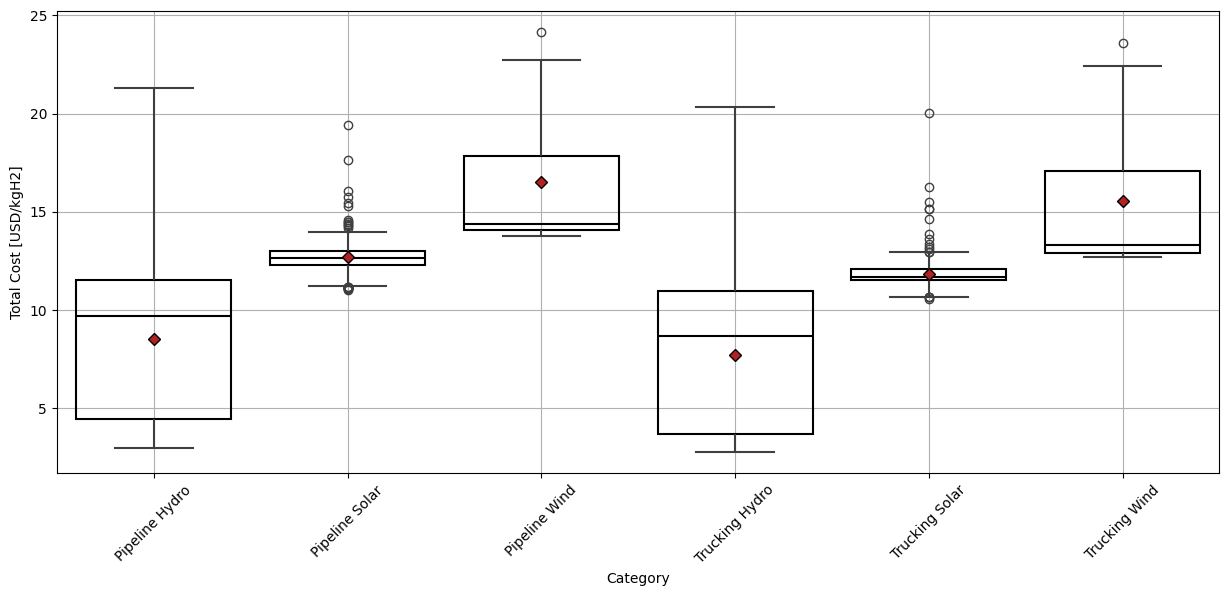

In [60]:

# Extract the total cost columns, rename them, and add a category label
pipeline_hydro_cost = gdf_pipeline_hydro[['Vientiane pipeline total cost']].copy()
pipeline_hydro_cost.rename(columns={'Vientiane pipeline total cost': 'Total Cost'}, inplace=True)
pipeline_hydro_cost['Category'] = 'Pipeline Hydro'

pipeline_solar_cost = gdf_pipeline_solar[['Vientiane pipeline total cost']].copy()
pipeline_solar_cost.rename(columns={'Vientiane pipeline total cost': 'Total Cost'}, inplace=True)
pipeline_solar_cost['Category'] = 'Pipeline Solar'

pipeline_wind_cost = gdf_pipeline_wind[['Vientiane pipeline total cost']].copy()
pipeline_wind_cost.rename(columns={'Vientiane pipeline total cost': 'Total Cost'}, inplace=True)
pipeline_wind_cost['Category'] = 'Pipeline Wind'

trucking_hydro_cost = gdf_trucking_hydro[['Vientiane trucking total cost']].copy()
trucking_hydro_cost.rename(columns={'Vientiane trucking total cost': 'Total Cost'}, inplace=True)
trucking_hydro_cost['Category'] = 'Trucking Hydro'

trucking_solar_cost = gdf_trucking_solar[['Vientiane trucking total cost']].copy()
trucking_solar_cost.rename(columns={'Vientiane trucking total cost': 'Total Cost'}, inplace=True)
trucking_solar_cost['Category'] = 'Trucking Solar'

trucking_wind_cost = gdf_trucking_wind[['Vientiane trucking total cost']].copy()
trucking_wind_cost.rename(columns={'Vientiane trucking total cost': 'Total Cost'}, inplace=True)
trucking_wind_cost['Category'] = 'Trucking Wind'

# Combine all into one DataFrame for plotting
cost_data = pd.concat([pipeline_hydro_cost, pipeline_solar_cost, pipeline_wind_cost,
                       trucking_hydro_cost, trucking_solar_cost, trucking_wind_cost])

plt.figure(figsize=(15, 6))

# Define meanpointprops and medianprops
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')
medianprops = dict(linestyle='-', color='black')

# Create the boxplot with thinner boxes and without filling them in blue
sns.boxplot(x='Category', y='Total Cost', data=cost_data, 
            showmeans=True, meanprops=meanpointprops, medianprops=medianprops,
            linewidth=1.5,  # Thinner box edges
            boxprops=dict(facecolor='none', edgecolor='black'))  # No fill, only black edges

# Rename the y-axis
plt.ylabel('Total Cost [USD/kgH2]')

# Optional: adjust x-axis label if needed
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.grid(True)

# Save the plot
plt.savefig(f'ratio_total/{year}/visualisation/{year}_total_cost_distribution_by_category.png', bbox_inches='tight')

# Show the plot
plt.show()

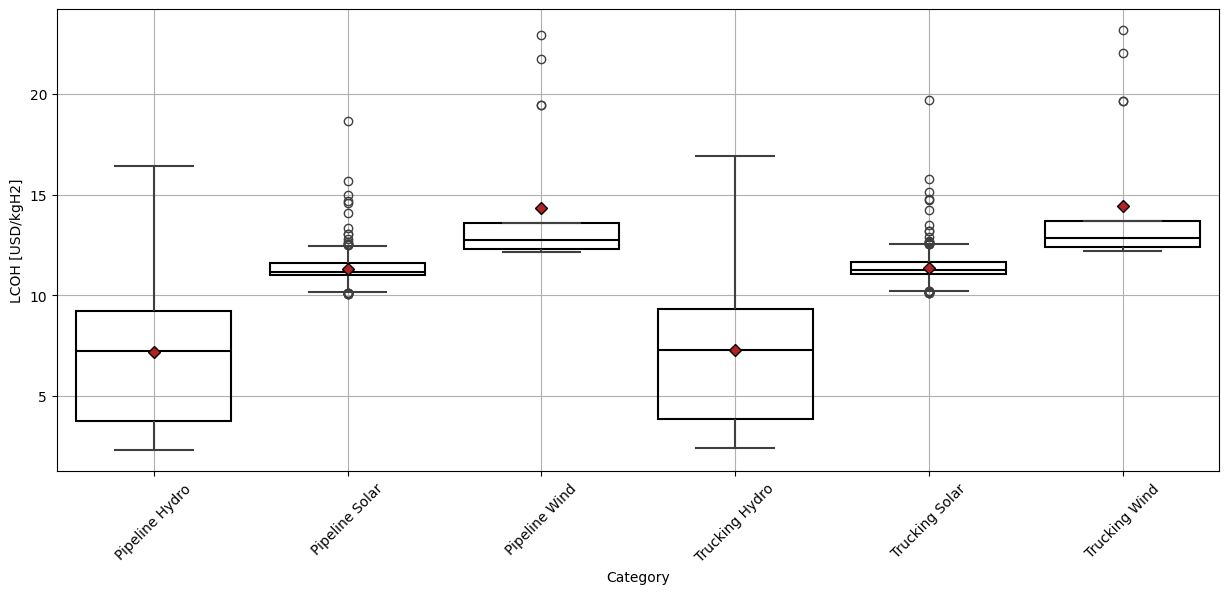

In [401]:

# Extract the production cost columns, rename them, and add a category label
pipeline_hydro_cost = gdf_pipeline_hydro[['Vientiane pipeline production cost']].copy()
pipeline_hydro_cost.rename(columns={'Vientiane pipeline production cost': 'Production Cost'}, inplace=True)
pipeline_hydro_cost['Category'] = 'Pipeline Hydro'

pipeline_solar_cost = gdf_pipeline_solar[['Vientiane pipeline production cost']].copy()
pipeline_solar_cost.rename(columns={'Vientiane pipeline production cost': 'Production Cost'}, inplace=True)
pipeline_solar_cost['Category'] = 'Pipeline Solar'

pipeline_wind_cost = gdf_pipeline_wind[['Vientiane pipeline production cost']].copy()
pipeline_wind_cost.rename(columns={'Vientiane pipeline production cost': 'Production Cost'}, inplace=True)
pipeline_wind_cost['Category'] = 'Pipeline Wind'

trucking_hydro_cost = gdf_trucking_hydro[['Vientiane trucking production cost']].copy()
trucking_hydro_cost.rename(columns={'Vientiane trucking production cost': 'Production Cost'}, inplace=True)
trucking_hydro_cost['Category'] = 'Trucking Hydro'

trucking_solar_cost = gdf_trucking_solar[['Vientiane trucking production cost']].copy()
trucking_solar_cost.rename(columns={'Vientiane trucking production cost': 'Production Cost'}, inplace=True)
trucking_solar_cost['Category'] = 'Trucking Solar'

trucking_wind_cost = gdf_trucking_wind[['Vientiane trucking production cost']].copy()
trucking_wind_cost.rename(columns={'Vientiane trucking production cost': 'Production Cost'}, inplace=True)
trucking_wind_cost['Category'] = 'Trucking Wind'

# Combine all into one DataFrame for plotting
cost_data = pd.concat([pipeline_hydro_cost, pipeline_solar_cost, pipeline_wind_cost,
                       trucking_hydro_cost, trucking_solar_cost, trucking_wind_cost])


plt.figure(figsize=(15, 6))

# Define meanpointprops and medianprops
meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')
medianprops = dict(linestyle='-', color='black')

# Create the boxplot with thinner boxes and without filling them in blue
sns.boxplot(x='Category', y='Production Cost', data=cost_data, 
            showmeans=True, meanprops=meanpointprops, medianprops=medianprops,
            linewidth=1.5,  # Thinner box edges
            boxprops=dict(facecolor='none', edgecolor='black'))  # No fill, only black edges

# plt.title('production Cost Distribution by Category')
# Rename the y-axis
plt.ylabel('LCOH [USD/kgH2]')
plt.xlabel('Category')

plt.xticks(rotation=45)
plt.grid(True)

plt.savefig(f'ratio_total/{year}/visualisation/{year}_LCOH_distribution_by_category.png', bbox_inches='tight')

plt.show()

# 2 Hydro, Wind, Solar capacity visualisation

In [467]:
def plot_capacity_map(hexagons, demand_center, capacity_column, save_path):
    """
    Plots a capacity map for a specific demand center and capacity type.
    
    Parameters:
    - hexagons: GeoDataFrame containing the geometries and data.
    - demand_center: Name of the demand center (e.g., 'Vientiane').
    - capacity_column: The specific column to plot (e.g., 'trucking solar capacity').
    - save_path: File path to save the PNG image.
    """
    crs = ccrs.PlateCarree()  # Example projection, adjust as needed
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': crs})
    ax.set_axis_off()

    # Create a copy to modify values
    hexagons_copy = hexagons.copy()

    # Mask for zero values
    zero_mask = hexagons_copy[capacity_column] == 0

    # Set zero values to NaN so they get the 'missing_kwds' style
    hexagons_copy.loc[zero_mask, capacity_column] = np.nan

    # Plot the data
    plot = hexagons_copy.to_crs(crs.proj4_init).plot(
        ax=ax,
        column=capacity_column,
        legend=True,
        cmap='cividis',  # Improved colormap
        norm=mcolors.Normalize(vmin=20, vmax=440),
        legend_kwds={
            'label': 'Capacity (MW)',
            'orientation': 'vertical',
            'shrink': 0.5,
            'pad': 0.05,
            'anchor': (-1.1, 1.0)  # Move the legend closer to the center
        },
        missing_kwds={
            "color": "lightgrey",
            "label": "No Data or Zero",
        },
        edgecolor='black',  # Adding borders to hexagons for better clarity
        linewidth=0.2
    )

    # Adjust legend position to be on the right side and closer to the center
    if plot.get_legend() is not None:
        legend = plot.get_legend()
        legend.set_bbox_to_anchor((1, 0.5))
        legend.set_frame_on(True)  # Ensure the legend has a border

    plt.show()

    # Save the figure
    fig.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close(fig)

# Example usage:
# plot_capacity_map(gdf, 'Vientiane', 'Vientiane trucking solar capacity', 'ratio_total/2022/visualisation/2022_Vientiane_trucking_solar_capacity.png')

In [469]:
gdf[gdf['Vientiane pipeline hydro capacity'] >250][['Vientiane pipeline hydro capacity','Vientiane pipeline production cost']]


,Vientiane pipeline hydro capacity,Vientiane pipeline production cost
174,317.521818,16.002245


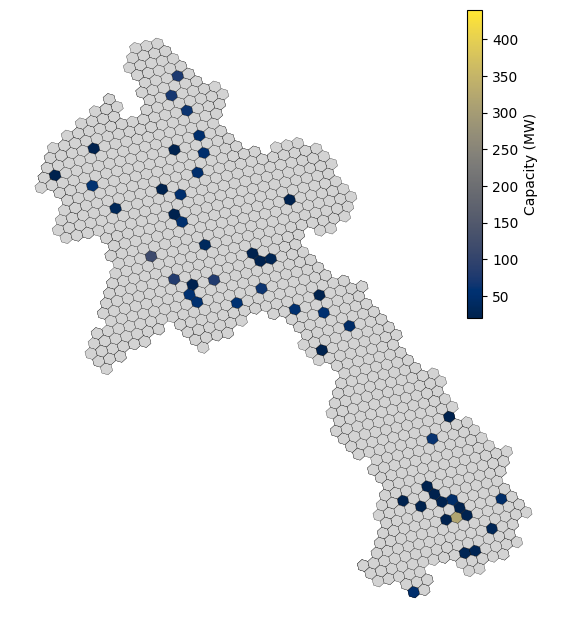

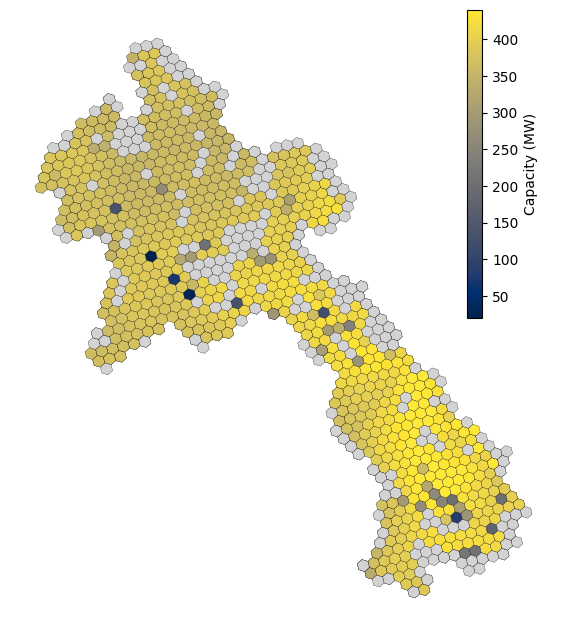

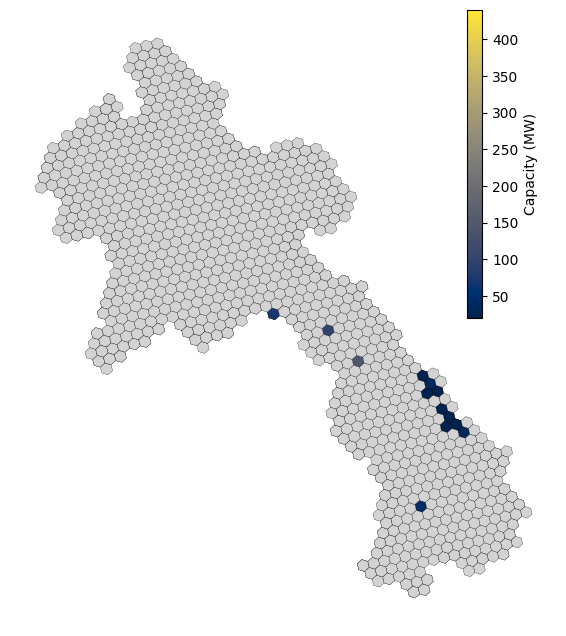

In [468]:

for capacity_type in ['hydro', 'solar', 'wind']:
    # plot_capacity_map(gdf, 'Vientiane', f'Vientiane trucking {capacity_type} capacity',
    #                   f'ratio_total/{year}/visualisation/{year}_Vientiane_trucking_{capacity_type}_capacity.png')
    plot_capacity_map(gdf, 'Vientiane', f'Vientiane pipeline {capacity_type} capacity',
                      f'ratio_total/{year}/visualisation/{year}_Vientiane_pipeline_{capacity_type}_capacity.png')


### Full hexagon map

In [64]:

def plot_full_cost_map(hexagons, demand_center, cost_column, save_path, provinces=None, vmin=None, vmax=None):
    """
    Plots a map showing production costs in USD/kg with province boundaries.
    
    Parameters:
    - hexagons: GeoDataFrame containing the hexagons and data.
    - demand_center: Name of the demand center (e.g., 'Vientiane').
    - cost_column: The specific column for production cost (e.g., 'Vientiane trucking production cost').
    - save_path: File path to save the PNG image.
    - provinces: GeoDataFrame for province boundaries.
    - vmin: Minimum value for the color scale (optional).
    - vmax: Maximum value for the color scale (optional).
    """
    crs = ccrs.PlateCarree()  # Example projection, adjust as needed
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': crs})
    ax.set_axis_off()

    hexagons_copy = hexagons.copy()

    # Mask zero values
    zero_mask = hexagons_copy[cost_column] == 0
    hexagons_copy.loc[zero_mask, cost_column] = np.nan

    # Plot the province boundaries if provided (this will be below the hexagons)
    if provinces is not None:
        provinces.to_crs(crs.proj4_init).plot(
            ax=ax, color='none', edgecolor='black', linewidth=0.5)

    # Plot the hexagons with production cost, applying the min/max thresholds
    plot = hexagons_copy.to_crs(crs.proj4_init).plot(
        ax=ax,
        column=cost_column,
        legend=True,
        cmap='Greens_r',  # 'Greens', # plasma
        legend_kwds={
            'label': 'Total cost (USD/kgH2)',
            'orientation': 'vertical',
            'shrink': 0.5,
            'pad': 0.05,
            'anchor': (-1.1, 1.0)
        },
        missing_kwds={
            "color": "lightgrey",
            "label": "No Data or Zero",
        },
        edgecolor='black',
        linewidth=0.2,
        vmin=vmin,  # Set the minimum value for the color scale
        vmax=vmax   # Set the maximum value for the color scale
    )

    # Adjust legend position to be on the right side and closer to the center
    if plot.get_legend() is not None:
        legend = plot.get_legend()
        legend.set_bbox_to_anchor((1, 0.5))
        legend.set_frame_on(True)

    plt.show()

    # Save the figure
    fig.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close(fig)

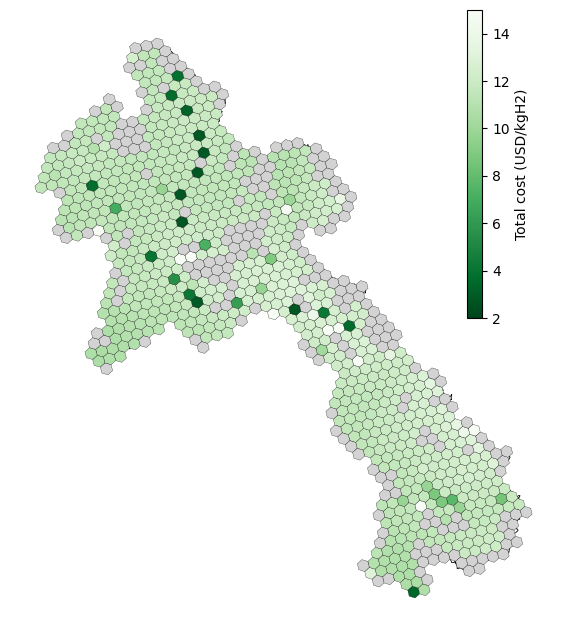

In [65]:

vmin = 2
vmax = 15
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

plot_full_cost_map(gdf, 'Vientiane', 'Vientiane lowest cost', 
              f'ratio_total/{year}/visualisation/{year}_lowest_cost.png',provinces,vmin,vmax)

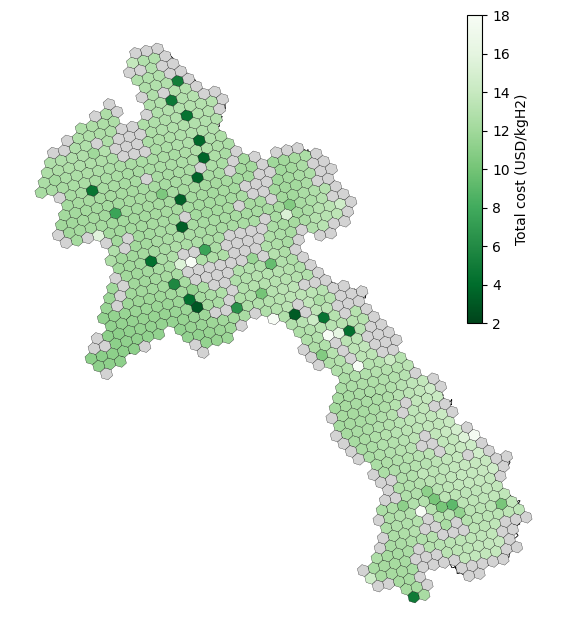

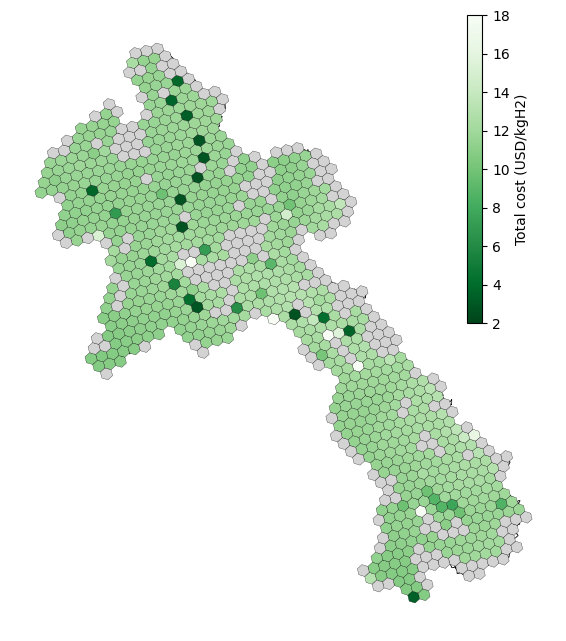

In [66]:

vmin = 2
vmax = 18


provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

plot_full_cost_map(gdf_pipeline, 'Vientiane', 'Vientiane pipeline total cost', 
              f'ratio_total/{year}/visualisation/{year}_pipeline_production_cost.png',provinces,vmin,vmax)

# Example usage with the top 100 hexagons for trucking
plot_full_cost_map(gdf_trucking, 'Vientiane', 'Vientiane trucking total cost', 
              f'ratio_total/{year}/visualisation/{year}_trucking_production_cost.png',provinces,vmin,vmax)

# 3 Top 100

In [407]:
def get_top_100_hexagons_by_cost(df, cost_column):
    """
    Returns the top 100 hexagons with the lowest production costs.
    
    Parameters:
    - df: GeoDataFrame containing the data.
    - cost_column: The specific column for production cost (e.g., 'Vientiane trucking production cost').
    
    Returns:
    - GeoDataFrame containing the top 100 hexagons.
    """
    # Sort by production cost
    sorted_df = df.sort_values(by=cost_column)
    
    # Select the top 100 hexagons
    top_100_df = sorted_df.head(100)
    
    return top_100_df



def plot_cost_map(hexagons, demand_center, cost_column, save_path, provinces=None):
    """
    Plots a map showing production costs in USD/kg with province boundaries.
    
    Parameters:
    - hexagons: GeoDataFrame containing the hexagons and data.
    - demand_center: Name of the demand center (e.g., 'Vientiane').
    - cost_column: The specific column for production cost (e.g., 'Vientiane trucking production cost').
    - save_path: File path to save the PNG image.
    - provinces: GeoDataFrame for province boundaries.
    """
    crs = ccrs.PlateCarree()  # Example projection, adjust as needed
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': crs})
    ax.set_axis_off()

    hexagons_copy = hexagons.copy()

    # Mask zero values
    zero_mask = hexagons_copy[cost_column] == 0
    hexagons_copy.loc[zero_mask, cost_column] = np.nan

    # Plot the province boundaries if provided (this will be below the hexagons)
    if provinces is not None:
        provinces.to_crs(crs.proj4_init).plot(
            ax=ax, color='none', edgecolor='black', linewidth=0.5)

    # Plot the hexagons with production cost
    plot = hexagons_copy.to_crs(crs.proj4_init).plot(
        ax=ax,
        column=cost_column,
        legend=True,
        cmap= 'Greens_r', # 'Greens', # plasma
        legend_kwds={
            'label': 'LCOH (USD/kgH2)',
            'orientation': 'vertical',
            'shrink': 0.5,
            'pad': 0.05,
            'anchor': (-1.1, 1.0) 
        },
        missing_kwds={
            "color": "lightgrey",
            "label": "No Data or Zero",
        },
        edgecolor='black',
        linewidth=0.2
    )

    # Adjust legend position to be on the right side and closer to the center
    if plot.get_legend() is not None:
        legend = plot.get_legend()
        legend.set_bbox_to_anchor((1, 0.5))
        legend.set_frame_on(True)

    plt.show()

    # Save the figure
    fig.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close(fig)

In [408]:
# Assuming gdf_pipeline and gdf_trucking are your GeoDataFrames
top_100_pipeline = get_top_100_hexagons_by_cost(gdf_pipeline, 'Vientiane pipeline production cost')
top_100_trucking = get_top_100_hexagons_by_cost(gdf_trucking, 'Vientiane trucking production cost')


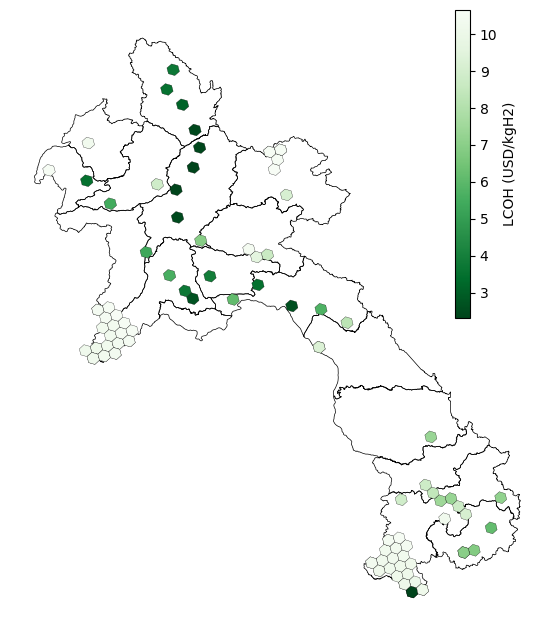

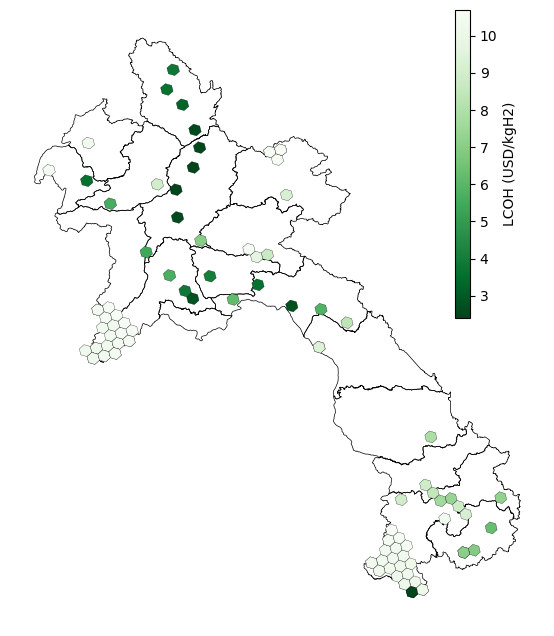

In [409]:

# Example usage with the top 100 hexagons for pipeline
plot_cost_map(top_100_pipeline, 'Vientiane', 'Vientiane pipeline production cost', 
              f'ratio_total/{year}/visualisation/{year}_top_100_pipeline_production_cost.png', provinces=provinces)

# Example usage with the top 100 hexagons for trucking
plot_cost_map(top_100_trucking, 'Vientiane', 'Vientiane trucking production cost', 
              f'ratio_total/{year}/visualisation/{year}_top_100_trucking_production_cost.png', provinces=provinces)

# 3 Below 10 USD/kg

In [410]:

def plot_cost_map_with_threshold(hexagons, demand_center, cost_column, save_path, provinces=None, threshold=10):
    """
    Plots a map showing production costs in USD/kg with province boundaries, 
    only including hexagons with costs below a specified threshold.
    
    Parameters:
    - hexagons: GeoDataFrame containing the hexagons and data.
    - demand_center: Name of the demand center (e.g., 'Vientiane').
    - cost_column: The specific column for production cost (e.g., 'Vientiane trucking production cost').
    - save_path: File path to save the PNG image.
    - provinces: GeoDataFrame for province boundaries.
    - threshold: The cost threshold in USD/kg to filter hexagons.
    """
    crs = ccrs.PlateCarree()  # Example projection, adjust as needed
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': crs})
    ax.set_axis_off()

    hexagons_copy = hexagons.copy()

    # Filter hexagons based on the cost threshold
    hexagons_copy = hexagons_copy[hexagons_copy[cost_column] < threshold]

    # Mask zero values
    zero_mask = hexagons_copy[cost_column] == 0
    hexagons_copy.loc[zero_mask, cost_column] = np.nan

    # Plot the province boundaries if provided (this will be below the hexagons)
    if provinces is not None:
        provinces.to_crs(crs.proj4_init).plot(
            ax=ax, color='none', edgecolor='black', linewidth=0.5)

    # Plot the hexagons with production cost
    plot = hexagons_copy.to_crs(crs.proj4_init).plot(
        ax=ax,
        column=cost_column,
        legend=True,
        cmap='Greens_r',
        legend_kwds={
            'label': 'LCOH (USD/kgH2)',
            'orientation': 'vertical',
            'shrink': 0.5,
            'pad': 0.05,
            'anchor': (-1.1, 1.0) 
        },
        missing_kwds={
            "color": "lightgrey",
            "label": "No Data or Zero",
        },
        edgecolor='black',
        linewidth=0.2
    )

    # Adjust legend position to be on the right side and closer to the center
    if plot.get_legend() is not None:
        legend = plot.get_legend()
        legend.set_bbox_to_anchor((1, 0.5))
        legend.set_frame_on(True)

    plt.show()

    # Save the figure
    fig.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close(fig)

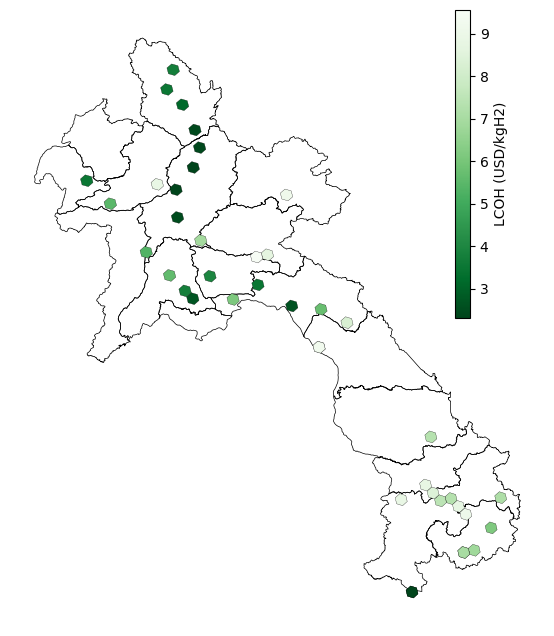

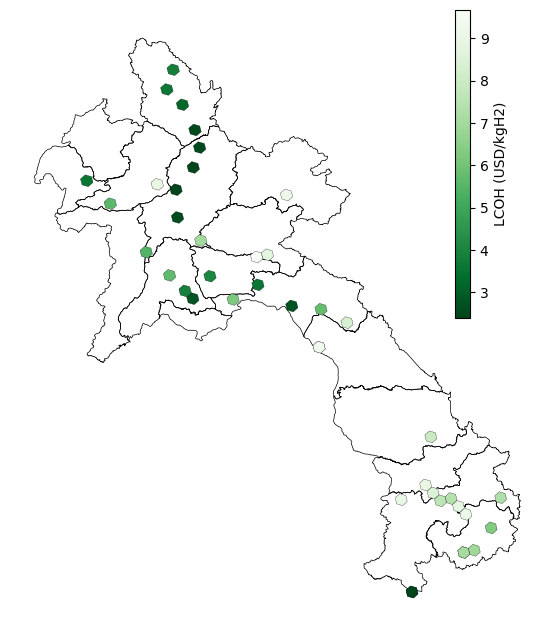

In [411]:

# Load the province boundaries GeoJSON file
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Example usage with a threshold of 10 USD/kg
plot_cost_map_with_threshold(top_100_pipeline, 'Vientiane', 'Vientiane pipeline production cost', 
                             f'ratio_total/{year}/visualisation/{year}_pipeline_production_cost_below_10.png', provinces=provinces, threshold=10)

plot_cost_map_with_threshold(top_100_trucking, 'Vientiane', 'Vientiane trucking production cost', 
                             f'ratio_total/{year}/visualisation/{year}_trucking_production_cost_below_10.png', provinces=provinces, threshold=10)

# 4 Min-cost Hexagon

### 4.1 Waterfall Chart

In [470]:
import plotly.graph_objects as go

# Assume gdf_pipeline and gdf_trucking are your GeoDataFrames
# Replace 'Vientiane pipeline total cost' and 'Vientiane trucking total cost' with actual column names if different

# Find the min-cost hexagon in the pipeline data
min_pipeline_hexagon = gdf_pipeline.loc[gdf_pipeline['Vientiane pipeline production cost'].idxmin()]
# min_trucking_hexagon = gdf_trucking.loc[gdf_trucking['Vientiane trucking production cost'].idxmin()]

# Choose which one to analyze
hexagon = min_pipeline_hexagon  # or 
# hexagon = min_trucking_hexagon

# Extract the transport type and relevant columns
transport = 'pipeline'

columns = [
    f'Vientiane LCOH - {transport} battery costs portion',
    f'Vientiane LCOH - {transport} electrolyzer portion',
    f'Vientiane LCOH - {transport} H2 storage portion',
    f'Vientiane LCOH - {transport} wind portion',
    f'Vientiane LCOH - {transport} solar portion',
    f'Vientiane LCOH - {transport} hydro portion'
]

# Extract the actual cost values from the selected hexagon
cost_values = {col: hexagon[col] for col in columns}

# Calculate total LCOH cost for the transport method
total_cost = hexagon[f'Vientiane {transport} production cost']

# Create lists for the waterfall chart
measures = ["relative"] * len(columns) + ["total"]
labels = [col.split(" - ")[1].replace(' portion', '') for col in columns] + ["Total"]
values = list(cost_values.values()) + [0]  # 0 for total, as it will be auto-calculated
texts = [f"{value:.2f}" for value in cost_values.values()] + [f"{total_cost:.2f}"]

# Create the waterfall chart
fig = go.Figure(go.Waterfall(
    name=f"{transport.capitalize()} LCOH Cost Breakdown",
    orientation="v",
    measure=measures,
    x=labels,
    y=values,
    text=texts,
    connector={"line": {"color": "rgb(63, 63, 63)"}},
    increasing={"marker": {"color": "blue"}},
    decreasing={"marker": {"color": "red"}},
    totals={"marker": {"color": "red"}}
))

# Update layout
fig.update_layout(
    xaxis_title="Cost Portions",
    yaxis_title="LCOH [USD/kgH2]",
    showlegend=False,
    width=800,
    height=600,
    font=dict(size=16)  # Increase the font size
)

# Show the plot
fig.show()


In [3]:

year = '2030'
# Load the GeoJSON file
file_path = f'ratio_total/{year}/hex_cost_components.geojson'  # Update with the correct path if necessary
# file_path = f'ratio_domestic/{year}/hex_cost_components.geojson'
gdf = gpd.read_file(file_path)
# gdf.columns

In [4]:
import plotly.graph_objects as go

# Assume gdf_pipeline and gdf_trucking are your GeoDataFrames
# Replace 'Vientiane pipeline total cost' and 'Vientiane trucking total cost' with actual column names if different

# Find the min-cost hexagon in the pipeline data
min_pipeline_hexagon = gdf.loc[gdf['Vientiane pipeline production cost'].idxmin()]

# Choose which one to analyze
hexagon = min_pipeline_hexagon  # or use another hexagon if needed

# Extract the transport type and relevant columns
transport = 'pipeline'

columns = [
    f'Vientiane LCOH - {transport} battery costs portion',
    f'Vientiane LCOH - {transport} electrolyzer portion',
    f'Vientiane LCOH - {transport} H2 storage portion',
    f'Vientiane LCOH - {transport} wind portion',
    f'Vientiane LCOH - {transport} solar portion',
    f'Vientiane LCOH - {transport} hydro portion'
]

# Extract the actual cost values from the selected hexagon
cost_values = {col: hexagon[col] for col in columns}

# Calculate total LCOH cost for the transport method
total_cost = hexagon[f'Vientiane {transport} production cost']

# Create lists for the waterfall chart
measures = ["relative"] * len(columns) + ["total"]
labels = [col.split(" - ")[1].replace(f' {transport}', '').replace(' portion', '') for col in columns] + ["Total"]
values = list(cost_values.values()) + [0]  # 0 for total, as it will be auto-calculated
texts = [f"{value:.2f}" for value in cost_values.values()] + [f"{total_cost:.2f}"]

# Create the waterfall chart with improved aesthetics
fig = go.Figure(go.Waterfall(
    name="LCOH Cost Breakdown",  # Removed transport type from title
    orientation="v",
    measure=measures,
    x=labels,
    y=values,
    text=texts,
    connector={"line": {"color": "rgb(63, 63, 63)", "dash": "dot"}},
    increasing={"marker": {"color": "#0000ff"}},
    decreasing={"marker": {"color": "#ff7f0e"}},
    totals={"marker": {"color": "#000000"}}
)) 

# Update layout to increase font sizes and improve the overall look
fig.update_layout(
    xaxis_title="Cost Portions",
    yaxis_title="LCOH [USD/kgH2]",
    xaxis=dict(
        tickfont=dict(color='black', size=20),  # Increased x-axis tick labels font size
        titlefont=dict(color='black', size=22),  # Increased x-axis title font size
        # showgrid=True,
        # gridcolor='lightgrey'
    ),
    yaxis=dict(
        tickfont=dict(color='black', size=20),  # Increased y-axis tick labels font size
        titlefont=dict(color='black', size=22),  # Increased y-axis title font size
        showgrid=True,
        gridcolor='lightgrey'
    ),
    plot_bgcolor='white',  # Set plot background color to white
    showlegend=False,
    width=900,
    height=600,
    font=dict(size=18),  # General font size increase
    margin=dict(l=50, r=50, t=100, b=50)
)

# Show the plot
fig.show()


### 4.2 Comparison with Average/Median Costs

In [58]:
import plotly.graph_objects as go
import pandas as pd

# Assume gdf_pipeline and gdf_trucking are your GeoDataFrames
# Replace 'Vientiane pipeline total cost' and 'Vientiane trucking total cost' with actual column names if different

# Find the min-cost hexagon in the pipeline data
min_pipeline_hexagon = gdf.loc[gdf['Vientiane pipeline production cost'].idxmin()]
# min_trucking_hexagon = gdf_trucking.loc[gdf_trucking['Vientiane trucking production cost'].idxmin()]

# Choose which one to analyze
hexagon = min_pipeline_hexagon  # or hexagon = min_trucking_hexagon

# Select the GeoDataFrame for analysis
gdf_analysis = gdf  # or gdf_trucking

# Extract the transport type and relevant columns
transport = 'trucking'  # 'trucking' or 'pipeline'

columns = [
    f'Vientiane LCOH - {transport} battery costs portion',
    f'Vientiane LCOH - {transport} electrolyzer portion',
    f'Vientiane LCOH - {transport} H2 storage portion',
    f'Vientiane LCOH - {transport} wind portion',
    f'Vientiane LCOH - {transport} solar portion',
    f'Vientiane LCOH - {transport} hydro portion'
]

# Calculate average and median for each cost portion
average_costs = gdf_analysis[columns].mean()  
median_costs = gdf_analysis[columns].median()

# Extract the actual cost values from the selected hexagon
min_cost_values = {col: hexagon[col] for col in columns}

# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame({
    'Min-Cost Hexagon': min_cost_values,
    'Average': average_costs,
    'Median': median_costs
})

# Transpose for easier plotting
comparison_df = comparison_df.T

# Define colors similar to the waterfall chart
custom_colors = {
    'Battery': '#FF8C00',  # Dark Orange
    'Electrolyzer': '#ff0000',  # Red
    'H2 Storage': '#ff00f2',  # Magenta
    'Wind': '#808080',  # Grey
    'Solar': '#fafa00',  # Yellow
    'Hydro': '#0000FF'  # Blue
}

custom_colors = {
    'Battery': '#f6f926',  # Dark Orange
    'Electrolyzer': '#ef553b',  # Red
    'H2 Storage': '#00cc96',  # Magenta
    'Wind': '#ab63fa',  # Grey
    'Solar': '#fecb52',  # Yellow
    'Hydro': 'blue'  # Blue
}

#Manually add each component as a separate bar trace
fig = go.Figure()

# Battery
fig.add_trace(go.Bar(
    name='Battery',
    x=comparison_df.index,
    y=comparison_df[f'Vientiane LCOH - {transport} battery costs portion'],
    text=[f"{v:.2f}" for v in comparison_df[f'Vientiane LCOH - {transport} battery costs portion']],
    textposition='auto',
    marker_color = custom_colors['Battery'],
))

# Electrolyzer
fig.add_trace(go.Bar(
    name='Electrolyzer',
    x=comparison_df.index,
    y=comparison_df[f'Vientiane LCOH - {transport} electrolyzer portion'],
    text=[f"{v:.2f}" for v in comparison_df[f'Vientiane LCOH - {transport} electrolyzer portion']],
    textposition='auto',
    marker=dict(color=custom_colors['Electrolyzer']),
))

# H2 Storage
fig.add_trace(go.Bar(
    name='H2 Storage',
    x=comparison_df.index,
    y=comparison_df[f'Vientiane LCOH - {transport} H2 storage portion'],
    text=[f"{v:.2f}" for v in comparison_df[f'Vientiane LCOH - {transport} H2 storage portion']],
    textposition='auto',
    marker=dict(color=custom_colors['H2 Storage']),
))

# Wind
fig.add_trace(go.Bar(
    name='Wind',
    x=comparison_df.index,
    y=comparison_df[f'Vientiane LCOH - {transport} wind portion'],
    text=[f"{v:.2f}" for v in comparison_df[f'Vientiane LCOH - {transport} wind portion']],
    textposition='auto',
    marker=dict(color=custom_colors['Wind']),
))

# Solar
fig.add_trace(go.Bar(
    name='Solar',
    x=comparison_df.index,
    y=comparison_df[f'Vientiane LCOH - {transport} solar portion'],
    text=[f"{v:.2f}" for v in comparison_df[f'Vientiane LCOH - {transport} solar portion']],
    textposition='auto',
    marker=dict(color=custom_colors['Solar']),
))

# Hydro
fig.add_trace(go.Bar(
    name='Hydro',
    x=comparison_df.index,
    y=comparison_df[f'Vientiane LCOH - {transport} hydro portion'],
    text=[f"{v:.2f}" for v in comparison_df[f'Vientiane LCOH - {transport} hydro portion']],
    textposition='auto',
    marker=dict(color=custom_colors['Hydro']),
))

# Update layout
fig.update_layout(
    barmode='group',
    plot_bgcolor='white',  # Set plot background color to white
    # xaxis_title="Comparison Type",
    yaxis_title="Cost [USD/kgH2]",
    xaxis=dict(
        tickfont=dict(color='black', size=20),  # Increased x-axis tick labels font size
        titlefont=dict(color='black', size=22),  # Increased x-axis title font size
        # showgrid=True,
        # gridcolor='lightgrey'
    ),
    yaxis=dict(
        tickfont=dict(color='black', size=20),  # Increased y-axis tick labels font size
        titlefont=dict(color='black', size=22),  # Increased y-axis title font size
        showgrid=True,
        gridcolor='lightgrey'
    ),
    showlegend=True,
    legend_title_text='',  # Remove the legend title
    font=dict(size=18),  # Make the font size bigger
    width=1000,
    height=600
)

# Show the plot
fig.show()


In [60]:
import geopandas as gpd

# List of years you want to analyze
years = ['2022', '2025', '2030', 'post_2030']

# Define the transport type
transport = 'pipeline'

# Define the relevant columns to analyze
columns = [
    f'Vientiane LCOH - {transport} battery costs portion',
    f'Vientiane LCOH - {transport} electrolyzer portion',
    f'Vientiane LCOH - {transport} H2 storage portion',
    f'Vientiane LCOH - {transport} wind portion',
    f'Vientiane LCOH - {transport} solar portion',
    f'Vientiane LCOH - {transport} hydro portion'
]

# Initialize a dictionary to store the average costs for each year
average_costs = {}

# Load the data for each year and calculate the mean for each column
for year in years:
    # Load the GeoJSON file
    file_path = f'ratio_total/{year}/hex_cost_components.geojson'
    gdf = gpd.read_file(file_path)
    
    # Calculate the mean for the relevant columns
    average_costs[year] = gdf[columns].mean()

# Calculate the drop in each column over the years
drops = {}
for column in columns:
    drops[column] = []
    for i in range(1, len(years)):
        drop = average_costs[years[i-1]][column] - average_costs[years[i]][column]
        drops[column].append(drop)

# Generate the LaTeX table
latex_table = """
\\begin{table}[h!]
\\centering
\\begin{tabular}{|c|""" + '|'.join(['c' for _ in range(len(years)-1)]) + """|}
\\hline
Component & """ + ' & '.join([f'{years[i-1]} to {years[i]}' for i in range(1, len(years))]) + """ \\\\
\\hline
"""

for column in columns:
    latex_table += column.split(' - ')[-1].replace(f'{transport} ', '').capitalize() + ' & '
    latex_table += ' & '.join([f'{drop:.2f}' for drop in drops[column]]) + """ \\\\
\\hline
"""

latex_table += """\\end{tabular}
\\caption{Drop in Average LCOH Components Over the Years}
\\label{tab:lcoh_drop_over_years}
\\end{table}
"""

# Print the LaTeX table code
print(latex_table)



\begin{table}[h!]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
Component & 2022 to 2025 & 2025 to 2030 & 2030 to post_2030 \\
\hline
Battery costs portion & -0.04 & -0.07 & 0.02 \\
\hline
Electrolyzer portion & 0.07 & 0.36 & 0.21 \\
\hline
H2 storage portion & 0.05 & 0.09 & 0.03 \\
\hline
Wind portion & -0.00 & -0.00 & 0.00 \\
\hline
Solar portion & 0.55 & 0.90 & 0.52 \\
\hline
Hydro portion & -0.02 & -0.01 & -0.01 \\
\hline
\end{tabular}
\caption{Drop in Average LCOH Components Over the Years}
\label{tab:lcoh_drop_over_years}
\end{table}



### 4.3 Geospatial Analysis

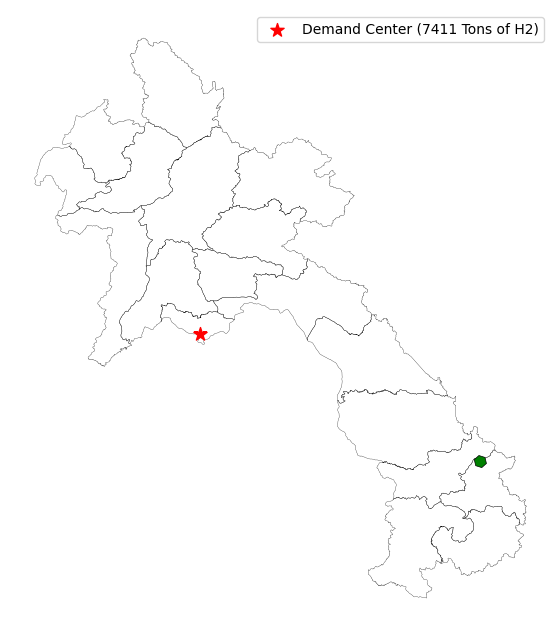

In [328]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point, LineString

def plot_min_cost_hexagon_with_demand(hexagon, provinces, demand_center_lat, demand_center_lon, demand_kg, save_path):
    """
    Plots the min-cost hexagon, province borders, and the demand center with demand information.
    
    Parameters:
    - hexagon: The GeoSeries of the min-cost hexagon.
    - provinces: GeoDataFrame for province boundaries.
    - demand_center_lat: Latitude of the demand center.
    - demand_center_lon: Longitude of the demand center.
    - demand_kg: The demand in kilograms of hydrogen.
    - save_path: File path to save the PNG image.
    """
    crs = ccrs.PlateCarree()
    geo_crs = "EPSG:4326"  # Assuming WGS84

    # Convert the hexagon geometry to a GeoSeries and set CRS
    hexagon_geo = gpd.GeoSeries([hexagon['geometry']], crs=geo_crs)

    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': crs})
    ax.set_axis_off()

    # Plot the province boundaries
    provinces.to_crs(crs.proj4_init).plot(
        ax=ax, color='none', edgecolor='black', linewidth=0.2)

    # Plot the min-cost hexagon in green
    hexagon_geo.to_crs(crs.proj4_init).plot(
        ax=ax, color='green', edgecolor='black', linewidth=0.5)

    # Plot the demand center
    demand_center = gpd.GeoSeries([Point(demand_center_lon, demand_center_lat)], crs=geo_crs)
    demand_center.to_crs(crs.proj4_init).plot(
        ax=ax, color='red', marker='*', markersize=100, label=f'Demand Center ({demand_kg} Tons of H2)')

    plt.legend()
    plt.show()

    # Save the figure
    fig.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close(fig)

# Example usage:
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')
demand_center_lat, demand_center_lon = 17.97,102.63  # Replace with actual coordinates
demand_kg = 7411  # Replace with actual demand in kg

plot_min_cost_hexagon_with_demand(min_pipeline_hexagon, provinces, demand_center_lat, demand_center_lon, demand_kg, f'ratio_total/{year}/visualisation/{year}_min_cost_hexagon_with_demand.png')
